In [1]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#x_train  y_train to train
#x_test   y_test to test
#x_valid  y_valid 
#video
import joblib
x_test_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert1/test/pred_test')
x_train_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert1/train/pred_train')
x_valid_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert1/valid/pred_valid')
y_test = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert1/test/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert1/train/labels_train')
y_valid = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert1/valid/labels_valid')
#audio

x_audio_test_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert1/test/predict_test')
x_audio_train_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert1/train/predict_train')
x_audio_valid_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert1/valid/predict_valid')
"""
#samples name
test_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')
train_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')
valid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')
"""

"\n#samples name\ntest_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')\ntrain_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')\nvalid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')\n"

In [4]:
len(x_test_prediction),len(x_train_prediction),len(x_audio_test_prediction),len(x_audio_train_prediction),len(x_valid_prediction),len(x_audio_valid_prediction)

(36, 288, 36, 288, 36, 36)

In [5]:
#x_train for video
x_train_prediction=x_train_prediction.append(x_valid_prediction,ignore_index = True)
#x_train for audio
x_audio_train_prediction=x_audio_train_prediction.append(x_audio_valid_prediction,ignore_index = True)

In [6]:
len(x_audio_train_prediction),len(x_train_prediction)

(324, 324)

In [7]:
from pandas.core.frame import DataFrame
df_train=DataFrame(y_train,columns=['labels'])
df_valid=DataFrame(y_valid,columns=['labels'])

In [8]:
df_train=df_train.append(df_valid,ignore_index = True)

In [9]:
len(df_train)

324

In [10]:
df_train

,labels
0,3
1,1
2,0
3,1
4,2
...,...
319,0
320,1
321,1
322,0


In [11]:
import pandas as pd

x_train = pd.concat([x_train_prediction, x_audio_train_prediction], axis=1,join='inner')
x_test =  pd.concat([x_test_prediction, x_audio_test_prediction], axis=1,join='inner')

In [12]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OA_0,OA_1,OA_2,OA_3,OA_4
0,0.999561,0.000007,0.000125,0.000255,0.000052,9.749166e-01,1.246328e-04,2.474468e-02,3.290517e-05,1.812225e-04
1,0.000295,0.000202,0.000925,0.998503,0.000076,2.369035e-03,2.573896e-03,4.736381e-06,9.945719e-01,4.804106e-04
2,0.000346,0.000496,0.988443,0.002007,0.008708,2.497520e-07,3.568326e-07,9.948954e-01,4.702794e-05,5.056947e-03
3,0.998876,0.000017,0.000284,0.000723,0.000100,8.733613e-01,1.323607e-04,1.187265e-01,1.748366e-05,7.762298e-03
4,0.999321,0.000011,0.000090,0.000512,0.000065,9.194685e-01,1.469121e-03,6.532153e-02,1.243071e-02,1.310213e-03
5,0.000006,0.999476,0.000111,0.000126,0.000280,3.595038e-05,3.744992e-03,1.091307e-05,9.058548e-01,9.035330e-02
6,0.000336,0.000552,0.987656,0.002111,0.009344,1.118773e-03,1.756904e-04,9.373138e-01,5.502131e-03,5.588963e-02
7,0.999031,0.000014,0.000186,0.000698,0.000070,5.976102e-01,2.026467e-04,4.017183e-01,4.732909e-06,4.640151e-04
8,0.999302,0.000014,0.000194,0.000425,0.000066,9.999480e-01,2.893829e-06,4.387170e-05,5.211833e-06,4.523673e-08
9,0.999626,0.000007,0.000169,0.000128,0.000071,7.223510e-01,2.462545e-05,2.774290e-01,6.918582e-07,1.946952e-04


In [13]:
len(x_test),len(x_train)

(36, 324)

In [14]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OA_0,OA_1,OA_2,OA_3,OA_4
0,0.001093,0.000234,0.001626,0.996937,0.000109,4.097124e-05,0.014463,1.820215e-05,9.853173e-01,1.604793e-04
1,0.000007,0.999472,0.000089,0.000173,0.000259,1.831251e-05,0.883402,1.006723e-04,1.150400e-01,1.439232e-03
2,0.999496,0.000010,0.000204,0.000237,0.000054,9.999769e-01,0.000006,1.645506e-05,4.355251e-07,2.210587e-08
3,0.000004,0.999489,0.000085,0.000149,0.000272,1.017702e-05,0.843685,6.865870e-06,4.033211e-03,1.522651e-01
4,0.000479,0.000579,0.981768,0.002800,0.014375,3.953131e-01,0.000013,6.026731e-01,3.497223e-05,1.965885e-03
...,...,...,...,...,...,...,...,...,...,...
319,0.999396,0.000008,0.000069,0.000481,0.000045,7.879140e-01,0.000343,2.080936e-01,4.326205e-04,3.216400e-03
320,0.000006,0.999095,0.000151,0.000126,0.000621,3.466065e-03,0.690833,2.540350e-04,2.983991e-01,7.047828e-03
321,0.000005,0.999471,0.000101,0.000150,0.000273,6.734900e-07,0.429462,9.036184e-05,5.544487e-01,1.599847e-02
322,0.997482,0.000023,0.000151,0.002267,0.000078,9.778641e-01,0.000001,2.178108e-02,1.013528e-04,2.525481e-04


In [15]:
from sklearn.utils import shuffle
seed=42
new_x_train = shuffle(x_train,random_state=seed)
new_y_train = shuffle(df_train,random_state=seed)
new_x_train = new_x_train.reset_index(drop=True)
new_y_train = new_y_train.reset_index(drop=True)
"""
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape
"""

'\ny_train=df_train.to_numpy()\ny_train=y_train.reshape(1860,)\ny_train, y_train.shape\n'

In [16]:
len(new_y_train)

324

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_x_train = scaler.fit_transform(new_x_train)
X_test = scaler.transform(x_test)

In [18]:
y_train=df_train.to_numpy()
y_train=y_train.reshape(324,)
y_train, y_train.shape

(array([3, 1, 0, 1, 2, 4, 3, 3, 3, 2, 2, 0, 1, 0, 0, 0, 2, 3, 1, 1, 1, 4,
        0, 3, 1, 0, 2, 1, 4, 0, 0, 2, 4, 3, 0, 0, 2, 4, 0, 3, 1, 1, 0, 2,
        3, 1, 3, 2, 0, 2, 0, 4, 4, 0, 4, 3, 1, 0, 0, 3, 0, 0, 3, 2, 4, 3,
        1, 3, 4, 1, 0, 1, 3, 1, 3, 4, 2, 0, 3, 0, 2, 0, 0, 3, 0, 4, 2, 4,
        4, 2, 0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 4, 0, 0, 0, 3, 3, 2, 4, 4,
        4, 0, 0, 4, 3, 2, 4, 2, 0, 4, 4, 0, 2, 2, 0, 4, 0, 1, 4, 0, 3, 3,
        0, 0, 3, 3, 1, 0, 2, 2, 4, 3, 1, 1, 4, 4, 3, 4, 3, 3, 0, 1, 4, 0,
        0, 1, 0, 4, 0, 4, 3, 4, 2, 3, 3, 0, 4, 0, 2, 2, 2, 4, 0, 2, 0, 0,
        4, 1, 2, 0, 0, 1, 3, 2, 1, 0, 0, 3, 0, 3, 1, 4, 1, 3, 0, 4, 0, 0,
        3, 0, 1, 0, 2, 0, 3, 4, 2, 2, 3, 2, 1, 0, 2, 1, 4, 0, 0, 2, 4, 3,
        0, 0, 2, 4, 2, 0, 0, 2, 1, 3, 1, 0, 1, 1, 0, 2, 1, 2, 3, 4, 0, 1,
        1, 0, 1, 1, 0, 4, 0, 1, 0, 4, 4, 0, 3, 3, 0, 2, 4, 2, 0, 1, 4, 1,
        0, 2, 4, 1, 0, 0, 1, 0, 2, 2, 3, 0, 2, 4, 0, 0, 1, 0, 1, 3, 0, 1,
        4, 3, 2, 2, 0, 0, 3, 4, 4, 2, 

# training machine learning

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np


#print("Restored model, accuracy: {:5.2f}%".format(100*acc))
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(new_x_train,new_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [20]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 1}

In [21]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.9969230769230769

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
knn = KNeighborsClassifier(n_neighbors=1)
kn=knn.fit(new_x_train,new_y_train)
predictions = knn.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [23]:
predictions

array([0, 3, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 4, 1, 0, 3, 3, 0, 0, 0, 0, 1,
       4, 3, 0, 1, 0, 0, 3, 1, 0, 0, 3, 0, 2, 2])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         2

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

----accuracy score 100.0 ----


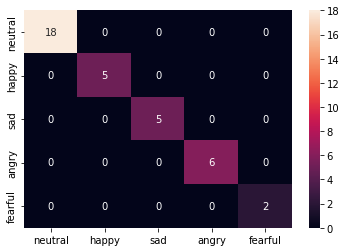

In [24]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [25]:
path='/content/drive/My Drive/fusion/savee_fusion_model/KNN/expert1'
savedvX = joblib.dump(knn, path)

print("MODEL SAVED")

MODEL SAVED
